#**Simple Linear Regression - Scratch (Gradient Descent Basic Code)**

### Scaling Methods :
**Min-Max Scaling**
  - min_max_scaler = MinMaxScaler()
  - X_minmax = min_max_scaler.fit_transform(X)

**Z-Score Normalization**
  - standard_scaler = StandardScaler()
  - X_standard = standard_scaler.fit_transform(X)

**Robust Scaling**
  - robust_scaler = RobustScaler()
  - X_robust = robust_scaler.fit_transform(X)

**MaxAbs Scaling**
  - maxabs_scaler = MaxAbsScaler()
  - X_maxabs = maxabs_scaler.fit_transform(X)

**Power Transformation**
  - power_transformer = PowerTransformer()
  - X_power = power_transformer.fit_transform(X)**

**Mount Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.datasets import load_diabetes, load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import MaxAbsScaler, PowerTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, explained_variance_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

**Code**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Practice/Placement_Data.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
X = df.iloc[:, 0].values.reshape(-1, 1)
Y = df.iloc[:, -1].values
print(X[:5])
print(Y[:5])
print(X.shape), print(Y.shape)

[[6.89]
 [5.12]
 [7.82]
 [7.42]
 [6.94]]
[3.26 1.98 3.25 3.67 3.57]
(200, 1)
(200,)


(None, None)

In [5]:
# Splitting data into Training and Testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((140, 1), (60, 1), (140,), (60,))

In [6]:
# Feature Scaling
scaler = StandardScaler() # Z-Score Normalization
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
print(x_train[:5])
print(x_test[:5])

[[ 2.08910805]
 [-0.92796755]
 [ 0.99281331]
 [ 1.75387743]
 [-0.121602  ]]
[[-0.33904889]
 [ 0.22268891]
 [ 0.32235207]
 [-0.95514841]
 [ 0.83878843]]


In [8]:
class LinearRegressionGD:
  def __init__(self, regul_l1=0.1, regul_l2=0.1, reg_type='l2'):
    self.regul_l1 = regul_l1  # L1 Regularization strength
    self.regul_l2 = regul_l2  # L2 Regularization strength
    self.reg_type = reg_type  # Regularization type
    self.w = None  # Weights

  def fit(self, X, y, lr=0.001, num_iter=10):  # Reduced learning rate

    # Add bias term to X -> [1 X]
    X = np.hstack([np.ones((len(X), 1)), X])

    # Initialize W to zeros
    self.w = np.zeros(X.shape[1])

    # Use gradient descent to minimize cost function
    for i in range(num_iter):

        y_pred = np.dot(X, self.w)  # y_pred shape is (n_samples,)

        # Calculate cost and gradients
        if self.reg_type == 'l2':
            cost = np.sum((y_pred - y) ** 2) + self.regul_l2 * np.sum(self.w ** 2)
            gradients = 2 * np.dot(X.T, (y_pred - y)) + 2 * self.regul_l2 * self.w

        elif self.reg_type == 'l1':
            cost = np.sum((y_pred - y) ** 2) + self.regul_l1 * np.sum(np.abs(self.w))
            gradients = 2 * np.dot(X.T, (y_pred - y)) + self.regul_l1 * np.sign(self.w)

        elif self.reg_type == 'elastic_net':
            cost = np.sum((y_pred - y) ** 2) + self.regul_l1 * np.sum(np.abs(self.w)) + self.regul_l2 * np.sum(self.w ** 2)
            gradients = 2 * np.dot(X.T, (y_pred - y)) + self.regul_l1 * np.sign(self.w) + 2 * self.regul_l2 * self.w

        else:
            cost = np.sum((y_pred - y) ** 2)
            gradients = 2 * np.dot(X.T, (y_pred - y))

        # Update W
        self.w = self.w - lr * gradients

        # Print Loss
        if i != num_iter:
            print(f"Iteration {i+1}, Cost: {cost}")

  def predict(self, X):
    X = np.hstack([np.ones((len(X), 1)), X])
    y_pred = np.dot(X, self.w)
    return y_pred

  # Mean Squared Error (MSE)
  def mean_squared_error(self, y_true, y_pred):
      mse = np.mean((y_true - y_pred) ** 2)
      return mse

  # Mean Absolute Error (MAE)
  def mean_absolute_error(self, y_true, y_pred):
      mae = np.mean(np.abs(y_true - y_pred))
      return mae

  # Explained Variance Score (EVS)
  def explained_variance_score(self, y_true, y_pred):
      numerator = np.var(y_true - y_pred)
      denominator = np.var(y_true)
      evs = 1 - (numerator / denominator)
      return evs

  # R2 Score
  def r2_score(self, y_true, y_pred):
      total_sum_of_squares = np.sum((y_true - np.mean(y_true)) ** 2)
      residual_sum_of_squares = np.sum((y_true - y_pred) ** 2)
      r2 = 1 - (residual_sum_of_squares / total_sum_of_squares)
      return r2

  # Method to evaluate all scores
  def evaluate(self, y_true, y_pred):
      mse = self.mean_squared_error(y_true, y_pred)
      mae = self.mean_absolute_error(y_true, y_pred)
      evs = self.explained_variance_score(y_true, y_pred)
      r2 = self.r2_score(y_true, y_pred)
      return mse, mae, evs, r2

In [9]:
# Train
lr = LinearRegressionGD(regul_l1=0.1, regul_l2=0.1, reg_type='l2')
lr.fit(x_train, y_train, lr=0.001, num_iter=10)

Iteration 1, Cost: 1341.5877
Iteration 2, Cost: 702.959811716501
Iteration 3, Cost: 372.0790137170451
Iteration 4, Cost: 200.64568846871902
Iteration 5, Cost: 111.82401860032535
Iteration 6, Cost: 65.80444202860532
Iteration 7, Cost: 41.96114533109531
Iteration 8, Cost: 29.607646238823097
Iteration 9, Cost: 23.207149622987792
Iteration 10, Cost: 19.890975264344277


In [10]:
# After training the model
intercept = lr.w[0]  # The first element of w is the intercept (bias)
slope = lr.w[1:]     # The remaining elements represent the slopes (coefficients for each feature)
print(f"Intercept (Bias): {intercept}")
print(f"Slope (Coefficient): {slope}")

Intercept (Bias): 2.8982326062098895
Slope (Coefficient): [0.60539068]


**Prediction**

In [11]:
# Prediction on X data (Training Data)
y_pred = lr.predict(x_test)
print(y_pred[:5])

[2.69297557 3.0330464  3.09338155 2.31999466 3.40602731]


In [12]:
# Prediction for random single data point
gyan = lr.predict(np.array([50]).reshape(-1, 1))
print(gyan)

[33.16776667]


**Accuracy**

In [13]:
# Custom Evaluation Accuracies
mse, mae, evs, r2 = lr.evaluate(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Explained Variance Score: {evs:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.11
Mean Absolute Error: 0.27
Explained Variance Score: 0.75
R² Score: 0.74


In [14]:
# Inbuilt Function Accuracies
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error : ", mse)
print("Mean Absolute Error : ", mae)
print("Explained Variance Score : ", evs)
print("R2 Score : ", r2)

Mean Squared Error :  0.10640772606375079
Mean Absolute Error :  0.2731731385042718
Explained Variance Score :  0.7540188050934973
R2 Score :  0.73661953759025


**Visualization**

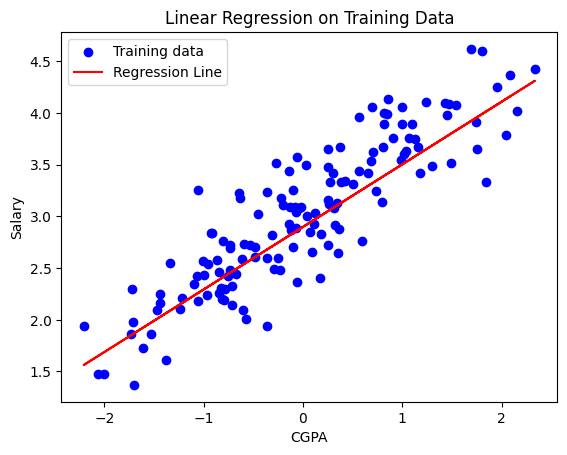

In [15]:
# Training data
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.plot(x_train, lr.predict(x_train), color='red', label='Regression Line')
plt.title('Linear Regression on Training Data')
plt.xlabel('CGPA')
plt.ylabel('Salary')
plt.legend()
plt.show()

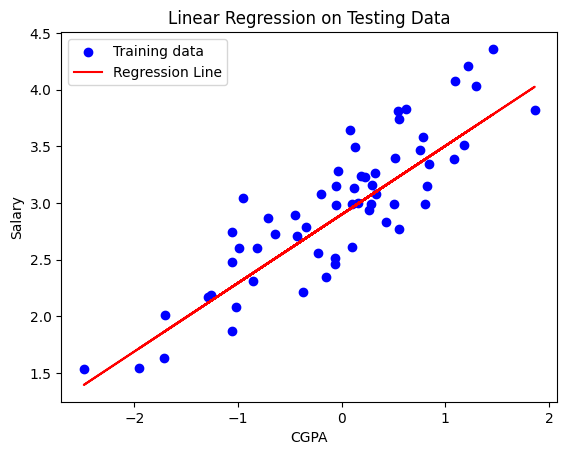

In [16]:
# Testing data
plt.scatter(x_test, y_test, color='blue', label='Training data')
plt.plot(x_test, lr.predict(x_test), color='red', label='Regression Line')
plt.title('Linear Regression on Testing Data')
plt.xlabel('CGPA')
plt.ylabel('Salary')
plt.legend()
plt.show()